In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
from google.colab import  drive
drive.mount('drive')

Mounted at drive


In [ ]:
df = pd.read_csv('drive/MyDrive/amazon.csv')

df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [ ]:

features_matrix = df.drop(columns=['actual_price'])

# Extracting the predictor column ('actual_price')
actual_price_column = df['actual_price']

# Transposing the features matrix and adding the predictor column as the last row
observations_features_matrix = features_matrix.transpose()
observations_features_matrix['actual_price'] = actual_price_column

# Displaying the transposed features matrix
print("Observations x Features Matrix:")
print(observations_features_matrix.head(1))





Observations x Features Matrix:
                     0           1           2           3           4  \
product_id  B07JW9H4J1  B098NS6PVG  B096MSW6CT  B08HDJ86NZ  B08CF3B7N1   

                     5           6           7           8           9  ...  \
product_id  B08Y1TFSP6  B08WRWPM22  B08DDRGWTJ  B008IFXQFU  B082LZGK39  ...   

                  1456        1457        1458        1459        1460  \
product_id  B0B9JZW1SQ  B00TI8E7BI  B07J9KXQCC  B0B3JSWG81  B08L7J3T31   

                  1461        1462        1463        1464 actual_price  
product_id  B01M6453MB  B009P2LIL4  B00J5DYCCA  B01486F4G6          NaN  

[1 rows x 1466 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

<bound method NDFrame.describe of       product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessori

In [ ]:

features_matrix = df.drop(columns=['actual_price'])

# Extracting the predictor column ('actual_price')
actual_price_column = df['actual_price']

# Transposing the features matrix and adding the predictor column as the last row
observations_features_matrix = features_matrix.transpose()
observations_features_matrix['actual_price'] = actual_price_column

# Displaying the transposed features matrix as tabular data
print("Observations x Features Matrix:")
print(observations_features_matrix.to_markdown(index=True))


Observations x Features Matrix:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df.columns
df.drop(['product_id','about_product','user_id','user_name','review_id','review_content','img_link','product_link'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['product_name', 'category', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'review_title'],
      dtype='object')

In [ ]:
df.head(2)

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269","Satisfied,Charging is really fast,Value for mo..."
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","A Good Braided Cable for Your Type C Device,Go..."


In [ ]:
threshold = len(df) * 0.1  # 10% threshold
df = df.dropna(axis=1, thresh=threshold)

df.columns

Index(['product_name', 'category', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'review_title'],
      dtype='object')

In [ ]:
df['discounted_price'] = df['discounted_price'].str.replace('[^\d.]', '', regex=True)
# Convert the cleaned values to float
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
print(df['discounted_price'])

0        399.0
1        199.0
2        199.0
3        329.0
4        154.0
         ...  
1460     379.0
1461    2280.0
1462    2219.0
1463    1399.0
1464    2863.0
Name: discounted_price, Length: 1465, dtype: float64


In [ ]:
df['actual_price'] = df['actual_price'].str.replace('[^\d.]', '', regex=True)
# Convert the cleaned values to float
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
print(df['actual_price'])

0       1099.0
1        349.0
2       1899.0
3        699.0
4        399.0
         ...  
1460     919.0
1461    3045.0
1462    3080.0
1463    1890.0
1464    3690.0
Name: actual_price, Length: 1465, dtype: float64


In [ ]:

# Removing '%' symbol from the 'discount_percentage' column
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')

# Converting the 'discount_percentage' column to numeric
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'])



In [ ]:
print(df['discount_percentage'])

0       64
1       43
2       90
3       53
4       61
        ..
1460    59
1461    25
1462    28
1463    26
1464    22
Name: discount_percentage, Length: 1465, dtype: int64


In [ ]:
df['rating'] = df['rating'].str.extract(r'(\d+(?:\.\d+)?)').astype(float)


print(df['rating'])

0       4.2
1       4.0
2       3.9
3       4.2
4       4.2
       ... 
1460    4.0
1461    4.1
1462    3.6
1463    4.0
1464    4.3
Name: rating, Length: 1465, dtype: float64


In [ ]:

# Removing ',' and converting 'rating_count' column to numeric
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce')

print(df['rating_count'].head())


0    24269.0
1    43994.0
2     7928.0
3    94363.0
4    16905.0
Name: rating_count, dtype: float64


In [ ]:

missing_values = df.isna().any()

# Display which columns have missing values
print("Columns with missing values:")
print(missing_values[missing_values].index)
# Drop rows with missing values
df = df.dropna()




Columns with missing values:
Index(['rating', 'rating_count'], dtype='object')


In [ ]:

selected_columns = ['discount_percentage', 'discounted_price', 'actual_price', 'rating']

# Creating a new DataFrame with only the selected columns
selected_df = df[selected_columns]

# Calculating the correlation matrix
correlation_matrix = selected_df.corr()

# Displaying the correlation matrix
print(correlation_matrix)


                     discount_percentage  discounted_price  actual_price  \
discount_percentage             1.000000         -0.242298     -0.117855   
discounted_price               -0.242298          1.000000      0.961910   
actual_price                   -0.117855          0.961910      1.000000   
rating                         -0.155679          0.121132      0.122467   

                       rating  
discount_percentage -0.155679  
discounted_price     0.121132  
actual_price         0.122467  
rating               1.000000  


In [ ]:


def process_categories(dataframe):
    # Apply the function to extract the first two categories and create the 'new_category' column
    dataframe['new_category'] = dataframe['category'].apply(extract_categories)

    # Replace null or nan values in the 'new_category' column with 'Unknown'
    dataframe['new_category'].fillna('Unknown', inplace=True)

    # Drop the original 'category' column
    dataframe = dataframe.drop('category', axis=1)

    return dataframe

def extract_categories(text):
    if pd.isnull(text):
        return 'Unknown'
    categories = text.split('|')
    if len(categories) >= 2:
        return categories[0] + ' ' + categories[1]
    else:
        return text

processed_df = process_categories(df.copy())

# Display the updated DataFrame
print(processed_df)


                                           product_name  discounted_price  \
0     Wayona Nylon Braided USB to Lightning Fast Cha...             399.0   
1     Ambrane Unbreakable 60W / 3A Fast Charging 1.5...             199.0   
2     Sounce Fast Phone Charging Cable & Data Sync U...             199.0   
3     boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...             329.0   
4     Portronics Konnect L 1.2M Fast Charging 3A 8 P...             154.0   
...                                                 ...               ...   
1460  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...             379.0   
1461  Prestige Delight PRWO Electric Rice Cooker (1 ...            2280.0   
1462  Bajaj Majesty RX10 2000 Watts Heat Convector R...            2219.0   
1463  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...            1399.0   
1464  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...            2863.0   

      actual_price  discount_percentage  rating  rating_count  \
0         

In [ ]:

processed_df.head()

,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title,new_category
0,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64,4.2,24269.0,"Satisfied,Charging is really fast,Value for mo...",Computers&Accessories Accessories&Peripherals
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43,4.0,43994.0,"A Good Braided Cable for Your Type C Device,Go...",Computers&Accessories Accessories&Peripherals
2,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90,3.9,7928.0,"Good speed for earlier versions,Good Product,W...",Computers&Accessories Accessories&Peripherals
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53,4.2,94363.0,"Good product,Good one,Nice,Really nice product...",Computers&Accessories Accessories&Peripherals
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61,4.2,16905.0,"As good as original,Decent,Good one for second...",Computers&Accessories Accessories&Peripherals


In [ ]:
df

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,"Satisfied,Charging is really fast,Value for mo..."
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"A Good Braided Cable for Your Type C Device,Go..."
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,"Good speed for earlier versions,Good Product,W..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,"Good product,Good one,Nice,Really nice product..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,"As good as original,Decent,Good one for second..."
...,...,...,...,...,...,...,...,...
1460,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59,4.0,1090.0,"Received the product without spanner,Excellent..."
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25,4.1,4118.0,"ok,everything was good couldn't return bcoz I ..."
1462,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219.0,3080.0,28,3.6,468.0,"very good,Work but front melt after 2 month,Go..."
1463,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",1399.0,1890.0,26,4.0,8031.0,"Fan Speed is slow,Good quality,Good product,go..."


In [ ]:



def process_review_title(dataframe):
    # Extract the first 6 words from the 'review_title' column
    dataframe['processed_review_title'] = dataframe['review_title'].apply(extract_words)
    # Drop the original 'review_title' column
    dataframe = dataframe.drop('review_title', axis=1)
    return dataframe

def extract_words(text):
    # Using regex to extract the first 6 words and remove special characters and numbers
    words = re.findall(r'\b[^\d\W]+\b', text)
    return ' '.join(words[:6])

# Update the original DataFrame directly
processed_df = process_review_title(processed_df)

# Display the updated DataFrame
print(processed_df)


                                           product_name  discounted_price  \
0     Wayona Nylon Braided USB to Lightning Fast Cha...             399.0   
1     Ambrane Unbreakable 60W / 3A Fast Charging 1.5...             199.0   
2     Sounce Fast Phone Charging Cable & Data Sync U...             199.0   
3     boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...             329.0   
4     Portronics Konnect L 1.2M Fast Charging 3A 8 P...             154.0   
...                                                 ...               ...   
1460  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...             379.0   
1461  Prestige Delight PRWO Electric Rice Cooker (1 ...            2280.0   
1462  Bajaj Majesty RX10 2000 Watts Heat Convector R...            2219.0   
1463  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...            1399.0   
1464  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...            2863.0   

      actual_price  discount_percentage  rating  rating_count  \
0         

In [ ]:
processed_df.head()

,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,new_category,processed_review_title
0,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64,4.2,24269.0,Computers&Accessories Accessories&Peripherals,Satisfied Charging is really fast Value
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43,4.0,43994.0,Computers&Accessories Accessories&Peripherals,A Good Braided Cable for Your
2,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90,3.9,7928.0,Computers&Accessories Accessories&Peripherals,Good speed for earlier versions Good
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53,4.2,94363.0,Computers&Accessories Accessories&Peripherals,Good product Good one Nice Really
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61,4.2,16905.0,Computers&Accessories Accessories&Peripherals,As good as original Decent Good


In [ ]:
processed_df.to_csv('New.csv')

In [ ]:
!pip install tensorflow
!pip install transformers
!pip install pandas

!pip install torch

In [ ]:
# Check for NaN values
print("NaN values in processed_df:")
print(processed_df.isna().sum())
# Remove NaN values
processed_df = processed_df.dropna()
# Reset the index
processed_df = processed_df.reset_index(drop=True)




NaN values in processed_df:
product_name              0
discounted_price          0
actual_price              0
discount_percentage       0
rating                    0
rating_count              0
new_category              0
processed_review_title    0
dtype: int64


In [ ]:
!pip install optuna

In [ ]:
#auto encoders
import optuna
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_n = processed_df._get_numeric_data()
df_n

,discounted_price,actual_price,discount_percentage,rating,rating_count
0,399.0,1099.0,64,4.2,24269.0
1,199.0,349.0,43,4.0,43994.0
2,199.0,1899.0,90,3.9,7928.0
3,329.0,699.0,53,4.2,94363.0
4,154.0,399.0,61,4.2,16905.0
...,...,...,...,...,...
1457,379.0,919.0,59,4.0,1090.0
1458,2280.0,3045.0,25,4.1,4118.0
1459,2219.0,3080.0,28,3.6,468.0
1460,1399.0,1890.0,26,4.0,8031.0


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df_n)
X

array([[-0.39305049, -0.40016451,  0.75568113,  0.35688975,  0.13944838],
       [-0.42183504, -0.46909362, -0.21624808, -0.33420007,  0.60083605],
       [-0.42183504, -0.32664013,  1.95902206, -0.67974499, -0.2427841 ],
       ...,
       [-0.13111103, -0.21809976, -0.91048322, -1.71637973, -0.41728103],
       [-0.24912771, -0.32746728, -1.00304791, -0.33420007, -0.24037483],
       [-0.03842477, -0.16203742, -1.18817728,  0.70243467, -0.26479504]])

In [ ]:
def create_model(n_layers, n_neurons, activation, learning_rate, batch_size, bottleneck_dim):
    input_layer = Input(shape=(X.shape[1],))
    encoded = input_layer
    for i in range(n_layers):
        encoded = Dense(n_neurons, activation=activation)(encoded)
    bottleneck = Dense(bottleneck_dim, activation=activation,name='bottleneck')(encoded)
    decoded = bottleneck
    for i in range(n_layers):
        decoded = Dense(n_neurons, activation=activation)(decoded)
    output_layer = Dense(X.shape[1], activation='linear')(decoded)
    autoencoder = Model(inputs=input_layer, outputs=output_layer)

    optimizer = Adam(lr=learning_rate)
    autoencoder.compile(optimizer=optimizer, loss='mse')
    return autoencoder

def objective(trial):
    n_layers = trial.suggest_int('n_layers', 1, 10)
    n_neurons = trial.suggest_int('n_neurons', 32, 128)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh','linear'])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    bottleneck_dim = trial.suggest_int('bottleneck_dim', 1, 2, 3)

    autoencoder = create_model(n_layers, n_neurons, activation, learning_rate, batch_size, bottleneck_dim)

    autoencoder.fit(X, X,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=0)

    loss = autoencoder.evaluate(X, X, verbose=0)
    return loss

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

best_params = study.best_params
print(best_params)

[I 2023-11-30 06:31:51,851] A new study created in memory with name: no-name-688a3c20-f6b6-462b-bf52-437d8241c663
[I 2023-11-30 06:31:56,245] Trial 0 finished with value: 0.5871112942695618 and parameters: {'n_layers': 3, 'n_neurons': 93, 'activation': 'linear', 'learning_rate': 0.00019803174007686152, 'batch_size': 64, 'bottleneck_dim': 1}. Best is trial 0 with value: 0.5871112942695618.
[I 2023-11-30 06:32:03,263] Trial 1 finished with value: 0.4112204313278198 and parameters: {'n_layers': 8, 'n_neurons': 91, 'activation': 'tanh', 'learning_rate': 5.9292235800066045e-05, 'batch_size': 32, 'bottleneck_dim': 1}. Best is trial 1 with value: 0.4112204313278198.
[I 2023-11-30 06:32:08,116] Trial 2 finished with value: 0.26104122400283813 and parameters: {'n_layers': 7, 'n_neurons': 110, 'activation': 'relu', 'learning_rate': 0.0001253908086126682, 'batch_size': 128, 'bottleneck_dim': 1}. Best is trial 2 with value: 0.26104122400283813.
[I 2023-11-30 06:32:17,885] Trial 3 finished with val

{'n_layers': 10, 'n_neurons': 127, 'activation': 'relu', 'learning_rate': 0.009649751647193698, 'batch_size': 128, 'bottleneck_dim': 1}


In [ ]:
autoencoder = create_model(best_params['n_layers'], best_params['n_neurons'], best_params['activation'], best_params['learning_rate'], best_params['batch_size'], best_params['bottleneck_dim'])
history = autoencoder.fit(X, X, batch_size=best_params['batch_size'], epochs=100, verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 14ms/step - loss: 0.9911
Epoch 2/100
12/12 [==============================] - 0s 12ms/step - loss: 0.8795
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 0.8411
Epoch 4/100
12/12 [==============================] - 0s 12ms/step - loss: 0.7468
Epoch 5/100
12/12 [==============================] - 0s 12ms/step - loss: 0.6672
Epoch 6/100
12/12 [==============================] - 0s 13ms/step - loss: 0.5190
Epoch 7/100
12/12 [==============================] - 0s 14ms/step - loss: 0.5027
Epoch 8/100
12/12 [==============================] - 0s 12ms/step - loss: 0.4507
Epoch 9/100
12/12 [==============================] - 0s 20ms/step - loss: 0.4119
Epoch 10/100
12/12 [==============================] - 0s 22ms/step - loss: 0.3829
Epoch 11/100
12/12 [==============================] - 0s 20ms/step - loss: 0.3627
Epoch 12/100
12/12 [==============================] - 0s 24ms/step - loss: 0.3567
Epoch 13/100
12/12 [=====

In [ ]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('bottleneck').output)
embeddings = pd.DataFrame(encoder.predict(X))

46/46 [==============================] - 0s 2ms/step


In [ ]:
embeddings.shape

(1462, 1)

In [ ]:
embeddings

,0
0,10.549693
1,4.741568
2,11.694753
3,1.602493
4,10.622136
...,...
1457,14.351567
1458,2.555389
1459,29.322842
1460,2.391041


In [ ]:

# Concatenate the embeddings DataFrame with the original DataFrame
processed_df = pd.concat([processed_df, embeddings], axis=1)
# Display the updated DataFrame
print(processed_df)


                                           product_name  discounted_price  \
0     Wayona Nylon Braided USB to Lightning Fast Cha...             399.0   
1     Ambrane Unbreakable 60W / 3A Fast Charging 1.5...             199.0   
2     Sounce Fast Phone Charging Cable & Data Sync U...             199.0   
3     boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...             329.0   
4     Portronics Konnect L 1.2M Fast Charging 3A 8 P...             154.0   
...                                                 ...               ...   
1457  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...             379.0   
1458  Prestige Delight PRWO Electric Rice Cooker (1 ...            2280.0   
1459  Bajaj Majesty RX10 2000 Watts Heat Convector R...            2219.0   
1460  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...            1399.0   
1461  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...            2863.0   

      actual_price  discount_percentage  rating  rating_count  \
0         

In [ ]:
processed_df

,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,new_category,processed_review_title,0
0,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64,4.2,24269.0,Computers&Accessories Accessories&Peripherals,Satisfied Charging is really fast Value,10.549693
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43,4.0,43994.0,Computers&Accessories Accessories&Peripherals,A Good Braided Cable for Your,4.741568
2,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90,3.9,7928.0,Computers&Accessories Accessories&Peripherals,Good speed for earlier versions Good,11.694753
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53,4.2,94363.0,Computers&Accessories Accessories&Peripherals,Good product Good one Nice Really,1.602493
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61,4.2,16905.0,Computers&Accessories Accessories&Peripherals,As good as original Decent Good,10.622136
...,...,...,...,...,...,...,...,...,...
1457,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,59,4.0,1090.0,Home&Kitchen Kitchen&HomeAppliances,Received the product without spanner Excellent,14.351567
1458,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,25,4.1,4118.0,Home&Kitchen Kitchen&HomeAppliances,ok everything was good couldn t,2.555389
1459,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,28,3.6,468.0,"Home&Kitchen Heating,Cooling&AirQuality",very good Work but front melt,29.322842
1460,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,26,4.0,8031.0,"Home&Kitchen Heating,Cooling&AirQuality",Fan Speed is slow Good quality,2.391041


In [ ]:
#renaming the embeddings coloumn
processed_df = processed_df.rename(columns={0: 'embeddings'})
# Display the updated DataFrame
print(processed_df)



                                           product_name  discounted_price  \
0     Wayona Nylon Braided USB to Lightning Fast Cha...             399.0   
1     Ambrane Unbreakable 60W / 3A Fast Charging 1.5...             199.0   
2     Sounce Fast Phone Charging Cable & Data Sync U...             199.0   
3     boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...             329.0   
4     Portronics Konnect L 1.2M Fast Charging 3A 8 P...             154.0   
...                                                 ...               ...   
1457  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...             379.0   
1458  Prestige Delight PRWO Electric Rice Cooker (1 ...            2280.0   
1459  Bajaj Majesty RX10 2000 Watts Heat Convector R...            2219.0   
1460  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...            1399.0   
1461  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...            2863.0   

      actual_price  discount_percentage  rating  rating_count  \
0         

In [ ]:
pip install transformers


In [ ]:

# Create a new DataFrame for embeddings
embeddings_df = pd.DataFrame()

# Tokenize and generate embeddings for the 'processed_review_title' column
for text in processed_df['processed_review_title']:
    # Tokenize the text
    tokens = tokenizer(text, return_tensors='pt')

    # Forward pass to get model output
    with torch.no_grad():
        outputs = model(**tokens)

    # Extract the embeddings from the last layer
    last_hidden_states = outputs.last_hidden_state

    # Average the embeddings over all tokens and dimensions
    average_embedding = last_hidden_states.mean().item()

    # Append the average embedding to the embeddings DataFrame
    embeddings_df = pd.concat([embeddings_df, pd.DataFrame([average_embedding])], ignore_index=True)

# Rename the column in embeddings_df
embeddings_df = embeddings_df.rename(columns={0: 'embedding'})

# Concatenate the embeddings DataFrame with the original DataFrame
processed_df = pd.concat([processed_df, embeddings_df], axis=1)




In [ ]:
embeddings_df.shape

(1462, 1)

In [ ]:
# Drop the 'processed_review_title' column
processed_df = processed_df.drop('processed_review_title', axis=1)
# Display the updated DataFrame
print(processed_df)

                                           product_name  discounted_price  \
0     Wayona Nylon Braided USB to Lightning Fast Cha...             399.0   
1     Ambrane Unbreakable 60W / 3A Fast Charging 1.5...             199.0   
2     Sounce Fast Phone Charging Cable & Data Sync U...             199.0   
3     boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...             329.0   
4     Portronics Konnect L 1.2M Fast Charging 3A 8 P...             154.0   
...                                                 ...               ...   
1457  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...             379.0   
1458  Prestige Delight PRWO Electric Rice Cooker (1 ...            2280.0   
1459  Bajaj Majesty RX10 2000 Watts Heat Convector R...            2219.0   
1460  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...            1399.0   
1461  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...            2863.0   

      actual_price  discount_percentage  rating  rating_count  \
0         

In [ ]:
#rename the embeddings to know the BERT created embeddings
processed_df['embedding_review'] = processed_df['embedding'].abs()
# Drop the original 'embedding' column
processed_df = processed_df.drop('embedding', axis=1)
# Display the updated DataFrame
print(processed_df)


                                           product_name  discounted_price  \
0     Wayona Nylon Braided USB to Lightning Fast Cha...             399.0   
1     Ambrane Unbreakable 60W / 3A Fast Charging 1.5...             199.0   
2     Sounce Fast Phone Charging Cable & Data Sync U...             199.0   
3     boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...             329.0   
4     Portronics Konnect L 1.2M Fast Charging 3A 8 P...             154.0   
...                                                 ...               ...   
1457  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...             379.0   
1458  Prestige Delight PRWO Electric Rice Cooker (1 ...            2280.0   
1459  Bajaj Majesty RX10 2000 Watts Heat Convector R...            2219.0   
1460  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...            1399.0   
1461  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...            2863.0   

      actual_price  discount_percentage  rating  rating_count  \
0         

In [ ]:
# Save the DataFrame to a CSV file
processed_df.to_csv('usecase_embeddings.csv', index=False)

# Move the CSV file to the /content directory (default directory in Colab)
!mv usecase_embeddings.csv /content

# Provide a download link for the CSV file
from google.colab import files
files.download('/content/usecase_embeddings.csv')


mv: 'usecase_embeddings.csv' and '/content/usecase_embeddings.csv' are the same file


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

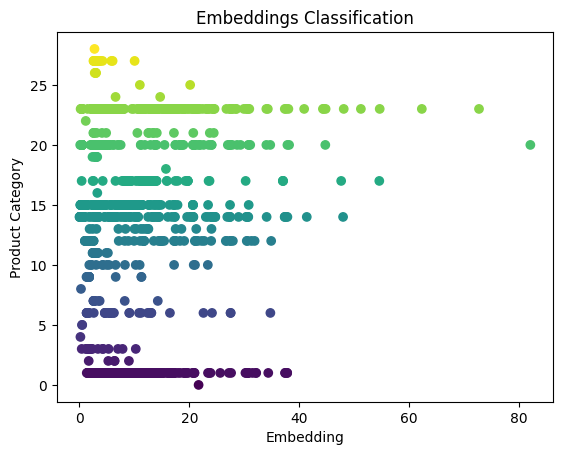

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC



# Perform classification using the product category column and the embeddings
X = processed_df['embeddings'].values.reshape(-1, 1)  # Reshape the embeddings to a single feature
y = processed_df['new_category']

# Encode the product category labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train an SVM classifier
classifier = SVC()
classifier.fit(X, y_encoded)

# Visualize the classification results
plt.scatter(X, y_encoded, c=y_encoded, cmap='viridis')
plt.title('Embeddings Classification')
plt.xlabel('Embedding')
plt.ylabel('Product Category')


plt.show()


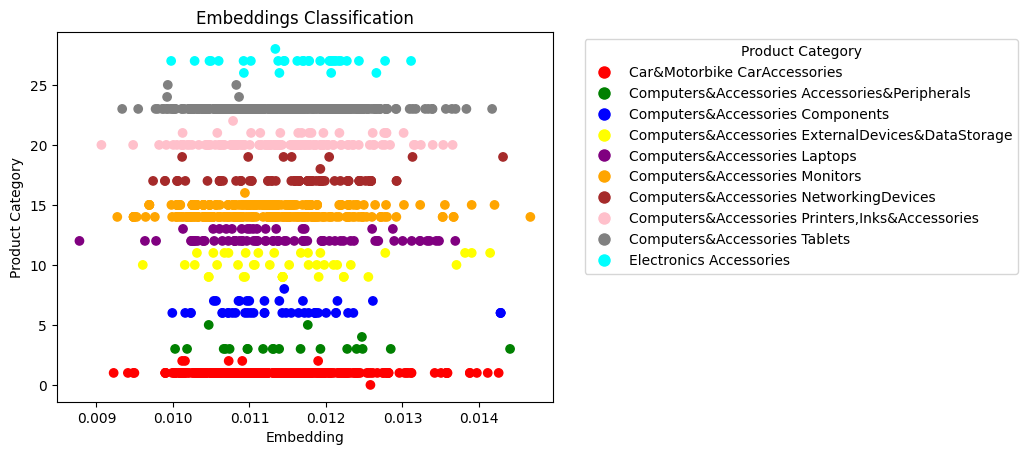

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

# Perform classification using the product category column and the embeddings
X = processed_df['embedding_review'].values.reshape(-1, 1)  # Reshape the embeddings to a single feature
y = processed_df['new_category']

# Use LabelEncoder to convert string labels to numerical labels for visualization
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train a RandomForest classifier
classifier = RandomForestClassifier()
classifier.fit(X, y_encoded)

# Visualize the classification results using numerical labels and different colors
cmap = ListedColormap(['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan'])
scatter = plt.scatter(X, y_encoded, c=y_encoded, cmap=cmap)

# Create separate legends for each unique category
unique_categories = label_encoder.classes_
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=category, markerfacecolor=color, markersize=10)
                  for category, color in zip(unique_categories, cmap.colors)]

# Position the legends to the right of the plot
plt.legend(handles=legend_handles, title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Embeddings Classification')
plt.xlabel('Embedding')
plt.ylabel('Product Category')
plt.show()
